### Import

In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

### Donnée tesla

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [3]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


### Donnée Ford et GM

In [4]:
start = datetime.datetime(2012, 1, 1)

end = datetime.datetime(2017, 1, 1)

ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM", 'yahoo', start, end)

In [5]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [6]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


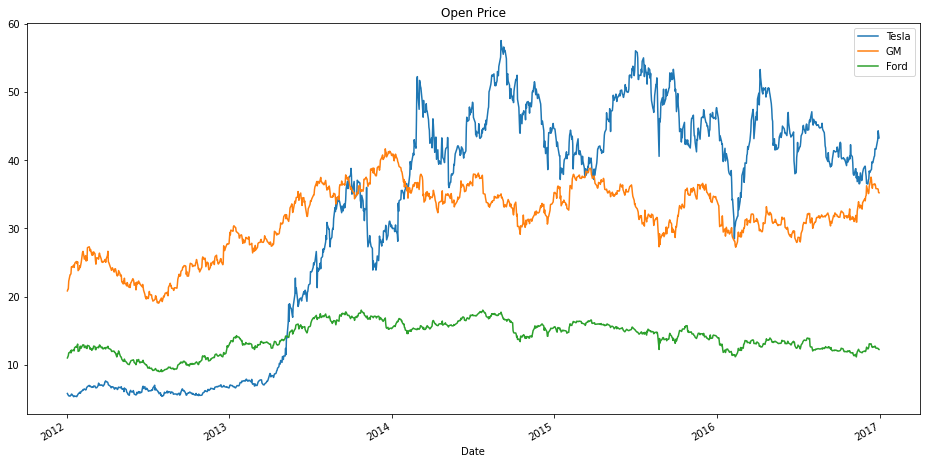

In [7]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

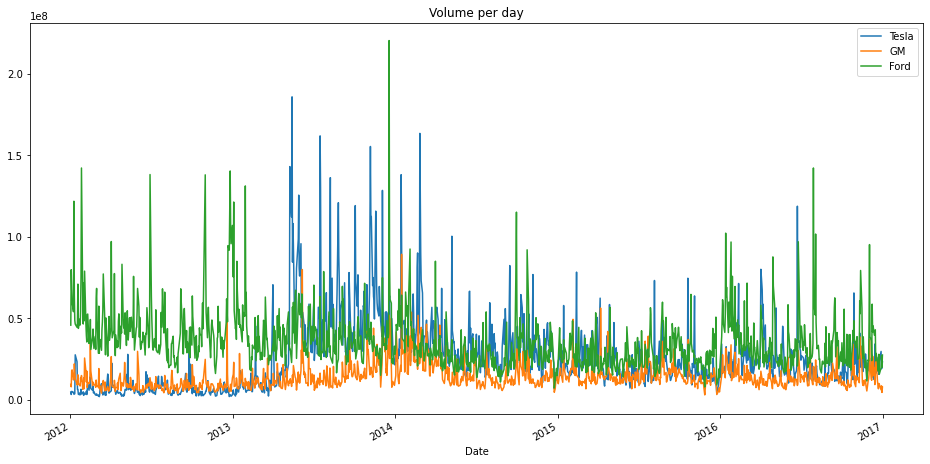

In [8]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume per day')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

### Volume max pour ford

In [9]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

### Création colonne total trade

In [10]:
ford['Total trade'] = ford['Volume'] * ford['Open']

In [11]:
tesla['Total trade'] = tesla['Volume'] * tesla['Open']

In [12]:
gm['Total trade'] = gm['Volume'] * gm['Open']

### Affichage

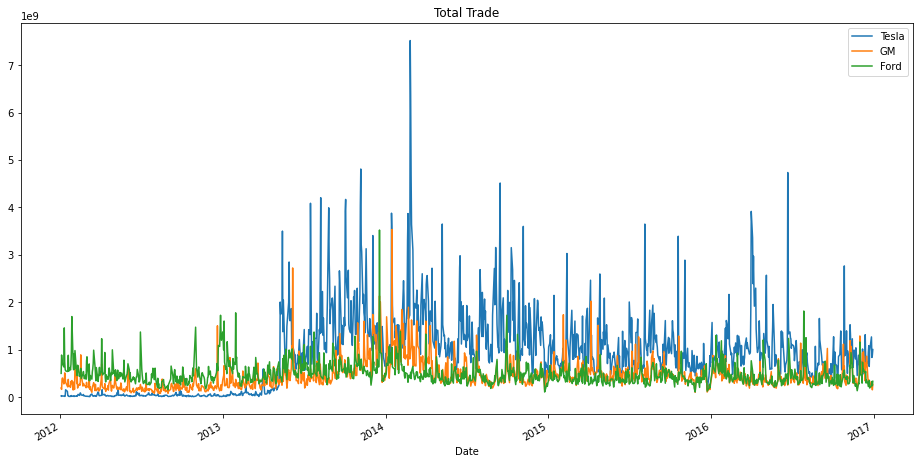

In [13]:
tesla['Total trade'].plot(label='Tesla',figsize=(16,8),title='Total Trade')
gm['Total trade'].plot(label='GM')
ford['Total trade'].plot(label='Ford')
plt.legend()

In [14]:
tesla['Total trade'].idxmax()

Timestamp('2014-02-25 00:00:00')

### Why ?

http://money.cnn.com/2014/02/25/investing/tesla-record-high/

### Graph moyenne glissante 50 et 200 Gm

<AxesSubplot:xlabel='Date'>

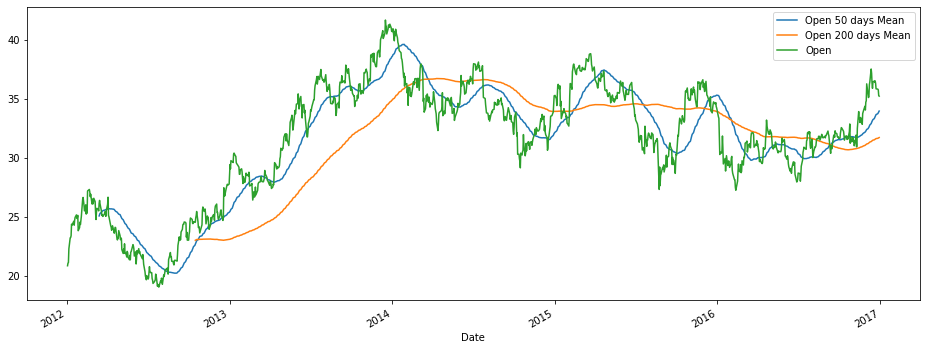

In [15]:
gm['Open 50 days Mean'] = gm['Open'].rolling(window=50).mean()
gm['Open 200 days Mean'] = gm['Open'].rolling(window=200).mean()
gm[['Open 50 days Mean', 'Open 200 days Mean', 'Open']].plot(figsize=(16,6))

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
df = pd.concat([gm['Open'], tesla['Open'], ford['Open']],axis=1)

In [18]:
df.head()

,Open,Open,Open
Date,,,
2012-01-03,20.830000,5.788,11.00
2012-01-04,21.049999,5.642,11.15
2012-01-05,21.100000,5.552,11.33
2012-01-06,22.260000,5.440,11.74
2012-01-09,23.200001,5.400,11.83


In [19]:
df.columns = ['Tesla Open','GM Open','Ford Open']

e:\projet_perso\analyse_bourse\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


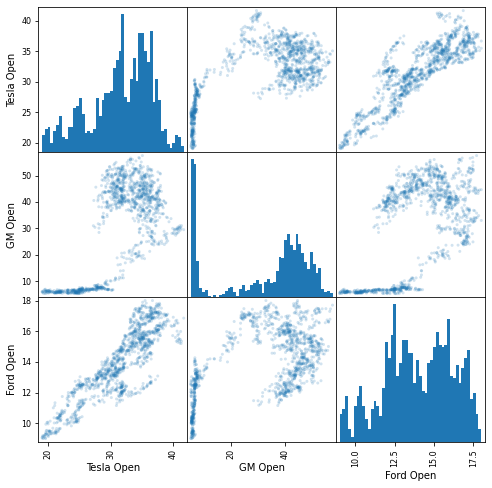

In [20]:
scatter_matrix(df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

### Viz chandelier pour ford en janvier 2012

In [21]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

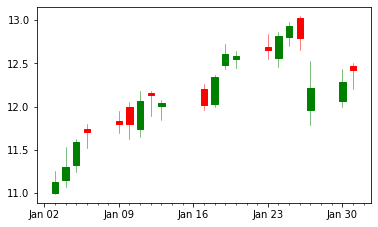

In [22]:
# Réinitialiser l'index pour obtenir une colonne des dates de janvier
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

# Créer une nouvelle colonne de valeurs numériques de "date" à utiliser par matplotlib
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY) # major ticks on the mondays
alldays = DayLocator() # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # e.g., Jan 12
dayFormatter = DateFormatter('%d') # e.g., 12

# Tracé
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

### Calcul rendement Moyen en pourcentage

In [23]:
# Méthode Shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [24]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total trade,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [25]:
gm['returns'] = (gm['Close'] / gm['Close'].shift(1) ) - 1

In [26]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total trade,Open 50 days Mean,Open 200 days Mean,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,NaN,NaN,-0.003490


In [27]:
ford['returns'] = (ford['Close'] / ford['Close'].shift(1) ) - 1

In [28]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total trade,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


In [29]:
# méthode 2: en utilisant pct_change
ford['returns'] = ford['Close'].pct_change(1)

In [30]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total trade,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


### Viz histo rendement moyen

<AxesSubplot:>

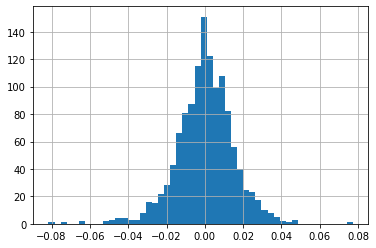

In [31]:
ford['returns'].hist(bins=50)

<AxesSubplot:>

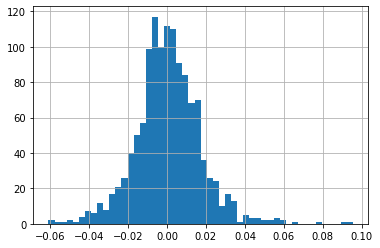

In [32]:
gm['returns'].hist(bins=50)

<AxesSubplot:>

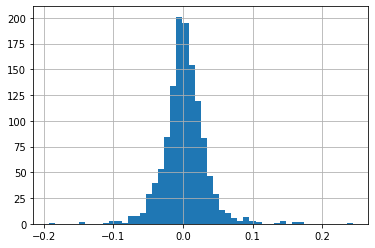

In [33]:
tesla['returns'].hist(bins=50)

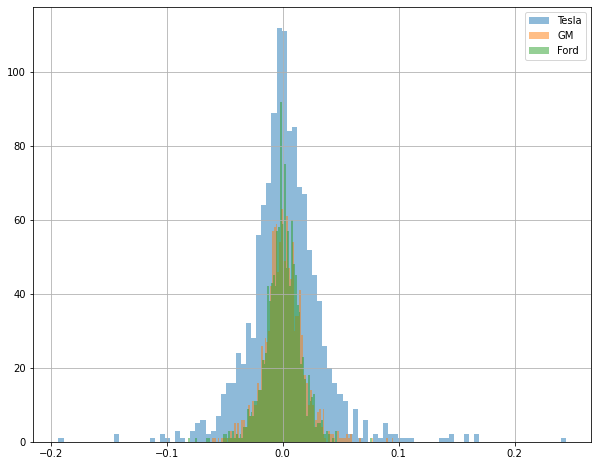

In [34]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

### Viz Kde

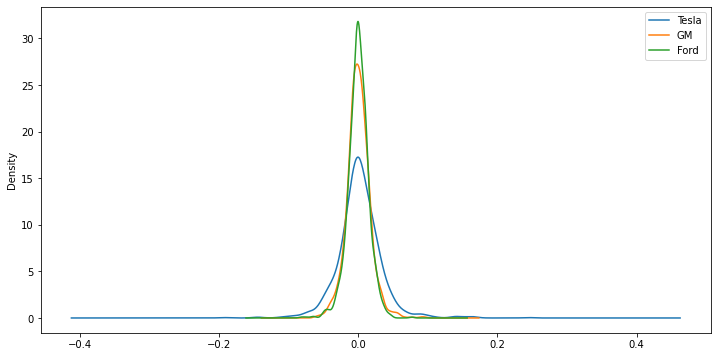

In [35]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

### Viz Daigramme en boite

<AxesSubplot:>

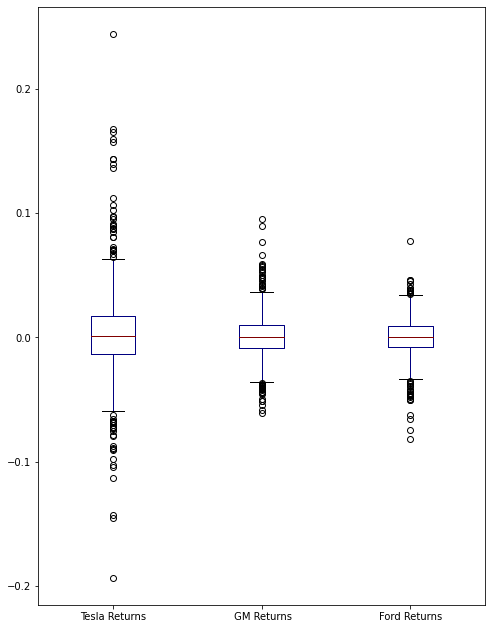

In [37]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

### Comparaison des rendements quotidiens entre les actions

e:\projet_perso\analyse_bourse\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel=' GM Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel=' GM Returns'>,
        <AxesSubplot:xlabel=' GM Returns', ylabel=' GM Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel=' GM Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel=' GM Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

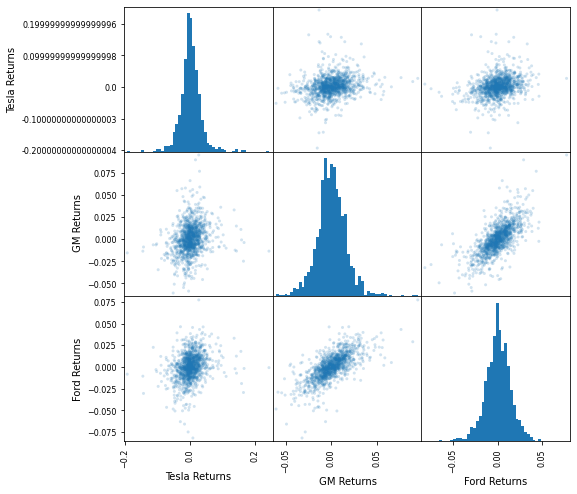

In [38]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})